In [26]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import torch
from torch import nn
from text import text_to_sequence, cmudict
from hparam_setup import create_hparams


In [2]:
hp = create_hparams()
text_cleaners = hp["text_cleaners"]
p_arpabet = hp["p_arpabet"]
xcmudict = None
if hp["cmudict_path"] is not None:
    xcmudict = cmudict.CMUDict(hp["cmudict_path"])


In [7]:
    def get_text(text):
        text_norm = torch.LongTensor(
            text_to_sequence(text, text_cleaners, xcmudict, p_arpabet))
        return text_norm


In [104]:
text = "say ay"
seq = get_text(text)
print(seq.shape)

torch.Size([4])


In [105]:
print(seq)

tensor([168, 139,   8, 139])


In [106]:
print(hp['n_symbols'])

185


In [107]:
embedding = nn.Embedding(
    hp["n_symbols"], hp["symbols_embedding_dim"])

In [72]:
xx=185*2//40
seq = torch.IntTensor([x//64 for x in range(1,185*2,xx)])*32
seq = seq.long()
print(seq)

tensor([  0,   0,   0,   0,   0,   0,   0,  32,  32,  32,  32,  32,  32,  32,
         32,  64,  64,  64,  64,  64,  64,  64,  96,  96,  96,  96,  96,  96,
         96, 128, 128, 128, 128, 128, 128, 128, 160, 160, 160, 160, 160])


In [108]:
embedded_inputs = embedding(seq)

In [109]:
print(embedded_inputs.shape)
print(embedded_inputs)

torch.Size([4, 512])
tensor([[ 0.3846,  0.2558,  1.8691,  ..., -1.1061, -1.6291, -0.0033],
        [ 0.3172,  1.0008, -0.8811,  ..., -0.5880,  0.3606, -0.5420],
        [ 1.3423, -1.7974, -0.9955,  ...,  0.6428, -0.3284, -1.7290],
        [ 0.3172,  1.0008, -0.8811,  ..., -0.5880,  0.3606, -0.5420]],
       grad_fn=<EmbeddingBackward>)


In [110]:
print(embedded_inputs[0].shape)
print(seq[0], embedded_inputs[0])
print(embedded_inputs[0][seq[0]].item())

torch.Size([512])
tensor(168) tensor([ 3.8465e-01,  2.5584e-01,  1.8691e+00,  1.6957e+00,  1.4784e+00,
        -1.5462e-01,  1.0161e+00, -1.3816e+00, -7.3148e-01,  7.7498e-01,
         8.1939e-02,  2.5982e+00, -2.2177e+00,  2.2044e+00, -1.1393e+00,
        -9.2573e-01,  1.0726e-01,  2.7139e-01,  8.5973e-01, -4.4540e-02,
         4.2294e-01,  1.2717e-01, -1.1971e+00, -8.9632e-01, -4.1624e-01,
        -1.3340e+00,  7.7054e-01,  1.0121e+00,  1.0477e+00, -5.4833e-02,
         1.6682e+00, -5.6484e-01,  3.2364e-01,  1.9800e-03, -2.1916e-01,
        -8.2109e-01,  8.3212e-01, -5.7595e-01, -4.3346e-01, -1.9463e+00,
         8.0480e-01, -6.8647e-01,  2.0363e+00,  1.6788e+00,  8.0537e-01,
        -7.4069e-01,  8.3580e-01, -1.4829e+00,  3.3176e-01,  1.4278e-01,
        -4.1797e-01, -9.5559e-01, -7.6976e-01,  8.8764e-01,  5.9252e-01,
         5.3664e-01, -3.3256e-01,  5.9155e-01, -9.2158e-01,  1.1484e+00,
         1.0269e+00,  5.3493e-01,  8.6259e-01, -3.0089e-01,  5.6120e-01,
         5.8639e-01, 

In [111]:
print(seq[1], embedded_inputs[1])

tensor(139) tensor([ 0.3172,  1.0008, -0.8811, -0.4414,  1.4929, -0.2124,  1.1028,  1.5545,
         0.2311,  0.0126, -0.2832, -0.6842,  0.1215, -0.9149,  0.1319,  1.7725,
        -0.6872, -0.5435, -1.1677, -1.1657, -0.5288,  1.2655, -0.2628,  0.9583,
         0.2250, -0.1291, -0.6799, -0.1311,  2.3976, -2.1856, -0.2585, -0.2291,
        -1.9344,  1.7451, -1.9088, -1.1619, -0.3089,  0.8492, -0.2274,  0.9872,
        -0.4698,  0.6973,  0.9654, -0.2673, -0.8500, -1.1705, -0.4445,  0.0460,
         0.0249, -1.7474, -0.5050,  0.8568,  0.4985, -0.8590, -0.5152, -0.8195,
        -1.6541, -0.1902, -0.3377, -0.7034, -1.9597, -0.7481, -1.0158, -0.2738,
        -0.5804,  0.3997, -0.3931,  0.0433,  0.5504,  0.8133, -0.6010,  0.3971,
        -0.2557, -0.5697,  0.3660,  0.6350,  1.1043, -0.6211, -0.3879,  0.3397,
        -1.1429, -0.2902,  0.6301, -1.3772,  0.1433, -0.3474,  0.4223, -1.1437,
        -0.8123,  0.9241, -1.0876, -1.3035, -1.1857,  1.5280,  0.2230, -0.3897,
         1.7477,  0.8412,  0

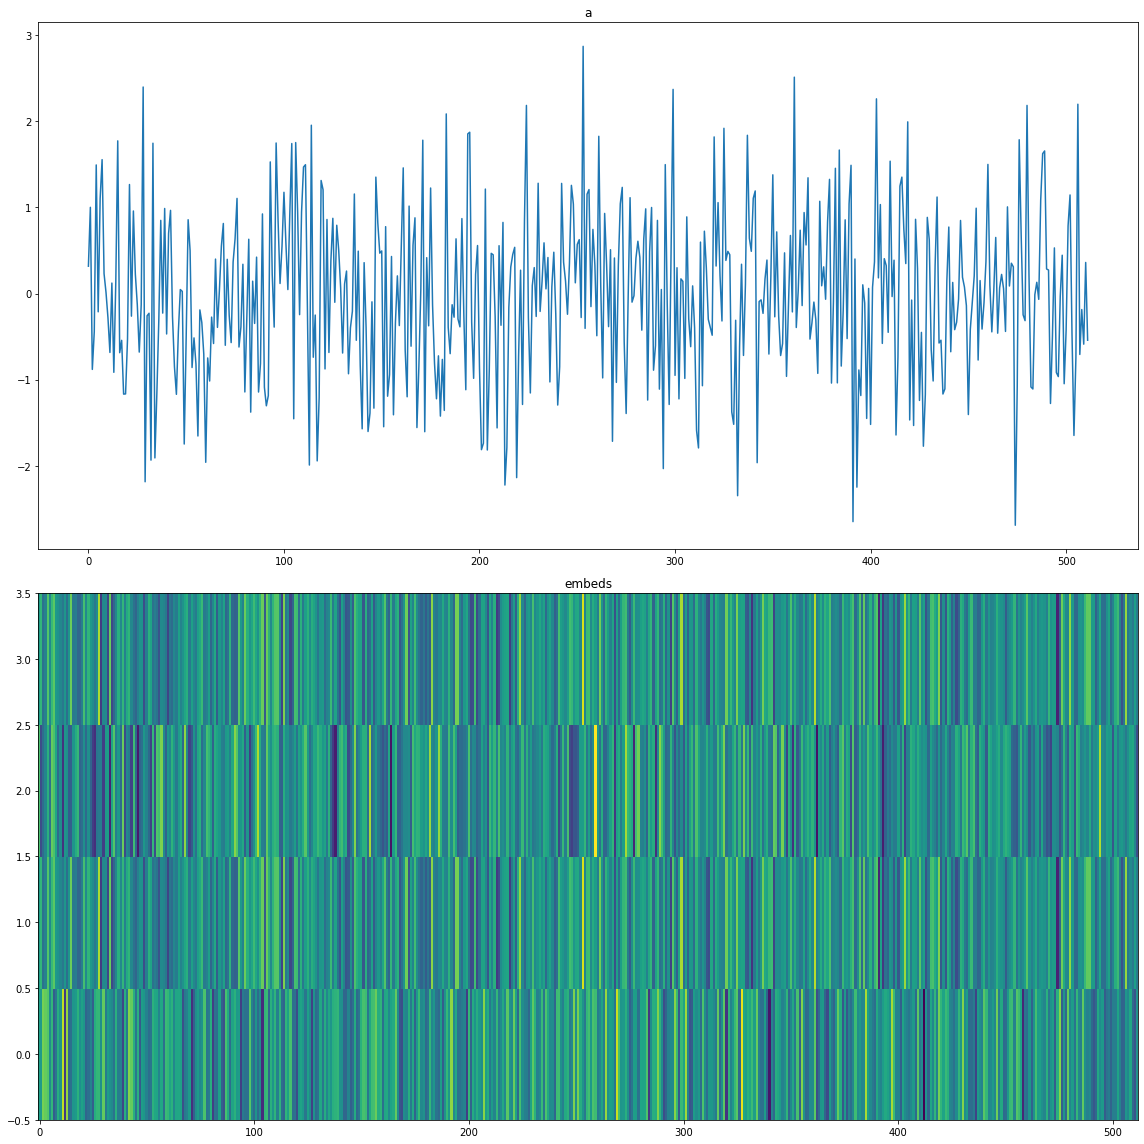

In [112]:
figsize=(16, 16)
fig, axes = plt.subplots(2, 1, figsize=figsize)
axes = axes.flatten()
xxx = embedded_inputs[1].detach().numpy()
axes[0].plot(range(len(xxx)), xxx) #, alpha=0.5, color='red', marker='.', s=1)
axes[0].set_title("a")
axes[1].imshow(embedded_inputs.detach().numpy(), aspect='auto', origin='bottom', interpolation='none')
axes[1].set_title("embeds")
# axes[1].imshow(mel_outputs_postnet, aspect='auto', origin='bottom', interpolation='none')
# axes[2].scatter(range(len(f0s)), f0s, alpha=0.5, color='red', marker='.', s=1)
# axes[2].set_xlim(0, len(f0s))
# axes[3].imshow(alignments, aspect='auto', origin='bottom', interpolation='none')
# axes[0].set_title("Source Mel")
# axes[1].set_title("Predicted Mel")
# axes[2].set_title("Source pitch contour")
# axes[3].set_title("Source rhythm")
plt.tight_layout()